In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('/content/train_LZdllcl.csv')
test = pd.read_csv('/content/test_2umaH9m.csv')

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,0.0,50.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0


EDA

In [6]:
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (30596, 14)
Shape of test : (23490, 13)


In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,30596.000000,30595.000000,30595.000000,28272.000000,30595.000000,30595.000000,30595.000000,30595.000000,30595.000000
mean,39163.404693,1.249616,34.792613,3.334394,5.866057,0.352966,0.022945,63.440039,0.083968
std,22585.914747,0.599696,7.663182,1.260556,4.278923,0.477900,0.149730,13.383730,0.277344
min,2.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19580.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39146.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58630.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78297.000000,10.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30596 entries, 0 to 30595
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           30596 non-null  int64  
 1   department            30596 non-null  object 
 2   region                30596 non-null  object 
 3   education             29211 non-null  object 
 4   gender                30596 non-null  object 
 5   recruitment_channel   30596 non-null  object 
 6   no_of_trainings       30595 non-null  float64
 7   age                   30595 non-null  float64
 8   previous_year_rating  28272 non-null  float64
 9   length_of_service     30595 non-null  float64
 10  KPIs_met >80%         30595 non-null  float64
 11  awards_won?           30595 non-null  float64
 12  avg_training_score    30595 non-null  float64
 13  is_promoted           30595 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 3.3+ MB


In [9]:
train.employee_id.value_counts()

employee_id
65438    1
51286    1
75547    1
27924    1
14860    1
        ..
52893    1
25139    1
3284     1
75226    1
70200    1
Name: count, Length: 30596, dtype: int64

In [10]:
train.department.value_counts()

department
Sales & Marketing    9329
Operations           6303
Technology           4036
Procurement          3955
Analytics            3018
Finance              1421
HR                   1358
Legal                 606
R&D                   570
Name: count, dtype: int64

In [11]:
train.region.value_counts()

region
region_2     6809
region_22    3577
region_7     2717
region_15    1537
region_13    1506
region_26    1266
region_31    1089
region_4      968
region_27     918
region_16     842
region_28     736
region_11     714
region_23     686
region_29     571
region_32     553
region_19     486
region_14     473
region_20     469
region_25     458
region_17     444
region_5      424
region_6      388
region_8      363
region_10     361
region_30     355
region_1      351
region_24     286
region_12     267
region_9      248
region_21     237
region_3      170
region_34     165
region_33     146
region_18      16
Name: count, dtype: int64

In [12]:
train.education.value_counts()

education
Bachelor's          20468
Master's & above     8308
Below Secondary       435
Name: count, dtype: int64

In [13]:
train.gender.value_counts()

gender
m    21505
f     9091
Name: count, dtype: int64

In [14]:
train.recruitment_channel.value_counts()

recruitment_channel
other       17084
sourcing    12892
referred      619
sour            1
Name: count, dtype: int64

In [15]:
train.no_of_trainings.value_counts()

no_of_trainings
1.0     24802
2.0      4473
3.0       958
4.0       261
5.0        66
6.0        22
7.0         5
8.0         4
9.0         3
10.0        1
Name: count, dtype: int64

In [16]:
print("Age varies from: ",train.age.min(),'yrs to',train.age.max(),'yrs')

Age varies from:  20.0 yrs to 60.0 yrs


In [17]:
train.previous_year_rating.value_counts()

previous_year_rating
3.0    10371
5.0     6601
4.0     5506
1.0     3460
2.0     2334
Name: count, dtype: int64

In [18]:
print("The years of employment varies from: ",train.length_of_service.min(),'yrs to',train.length_of_service.max(),'yrs')

The years of employment varies from:  1.0 yrs to 34.0 yrs


In [19]:
train['KPIs_met >80%'].value_counts()

KPIs_met >80%
0.0    19796
1.0    10799
Name: count, dtype: int64

In [20]:
train['awards_won?'].value_counts()

awards_won?
0.0    29893
1.0      702
Name: count, dtype: int64

In [21]:
print("Average score ranges between: ",train.avg_training_score.min(),'to',train.avg_training_score.max())

Average score ranges between:  39.0 to 99.0


In [22]:
train.is_promoted.value_counts()

is_promoted
0.0    28026
1.0     2569
Name: count, dtype: int64

Perform EDA (Exploratory Data Analysis)

In [23]:
# Exclude non-numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
cor = train[numeric_columns].corr()

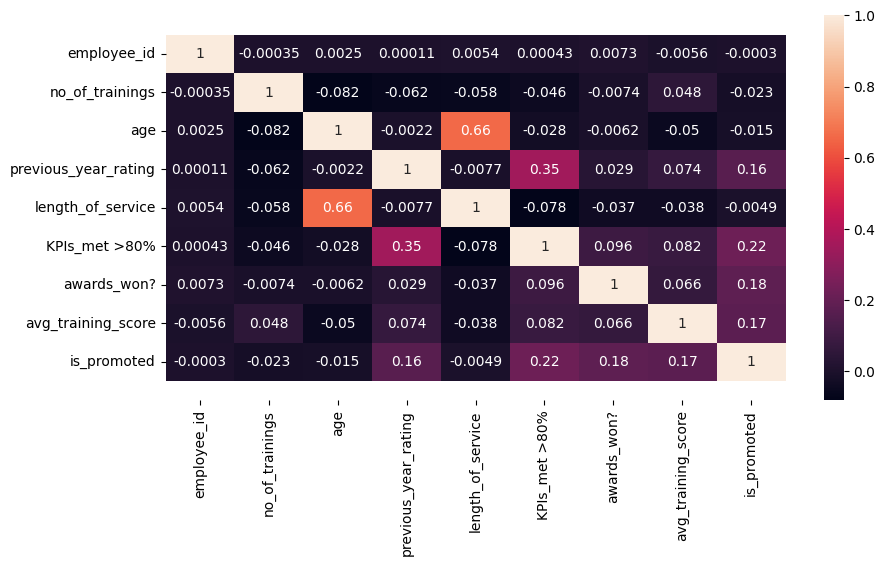

In [24]:
# Plot correlation matrix
plt.figure(figsize=(10, 5))
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [ ]:
# Age variable is coorelated

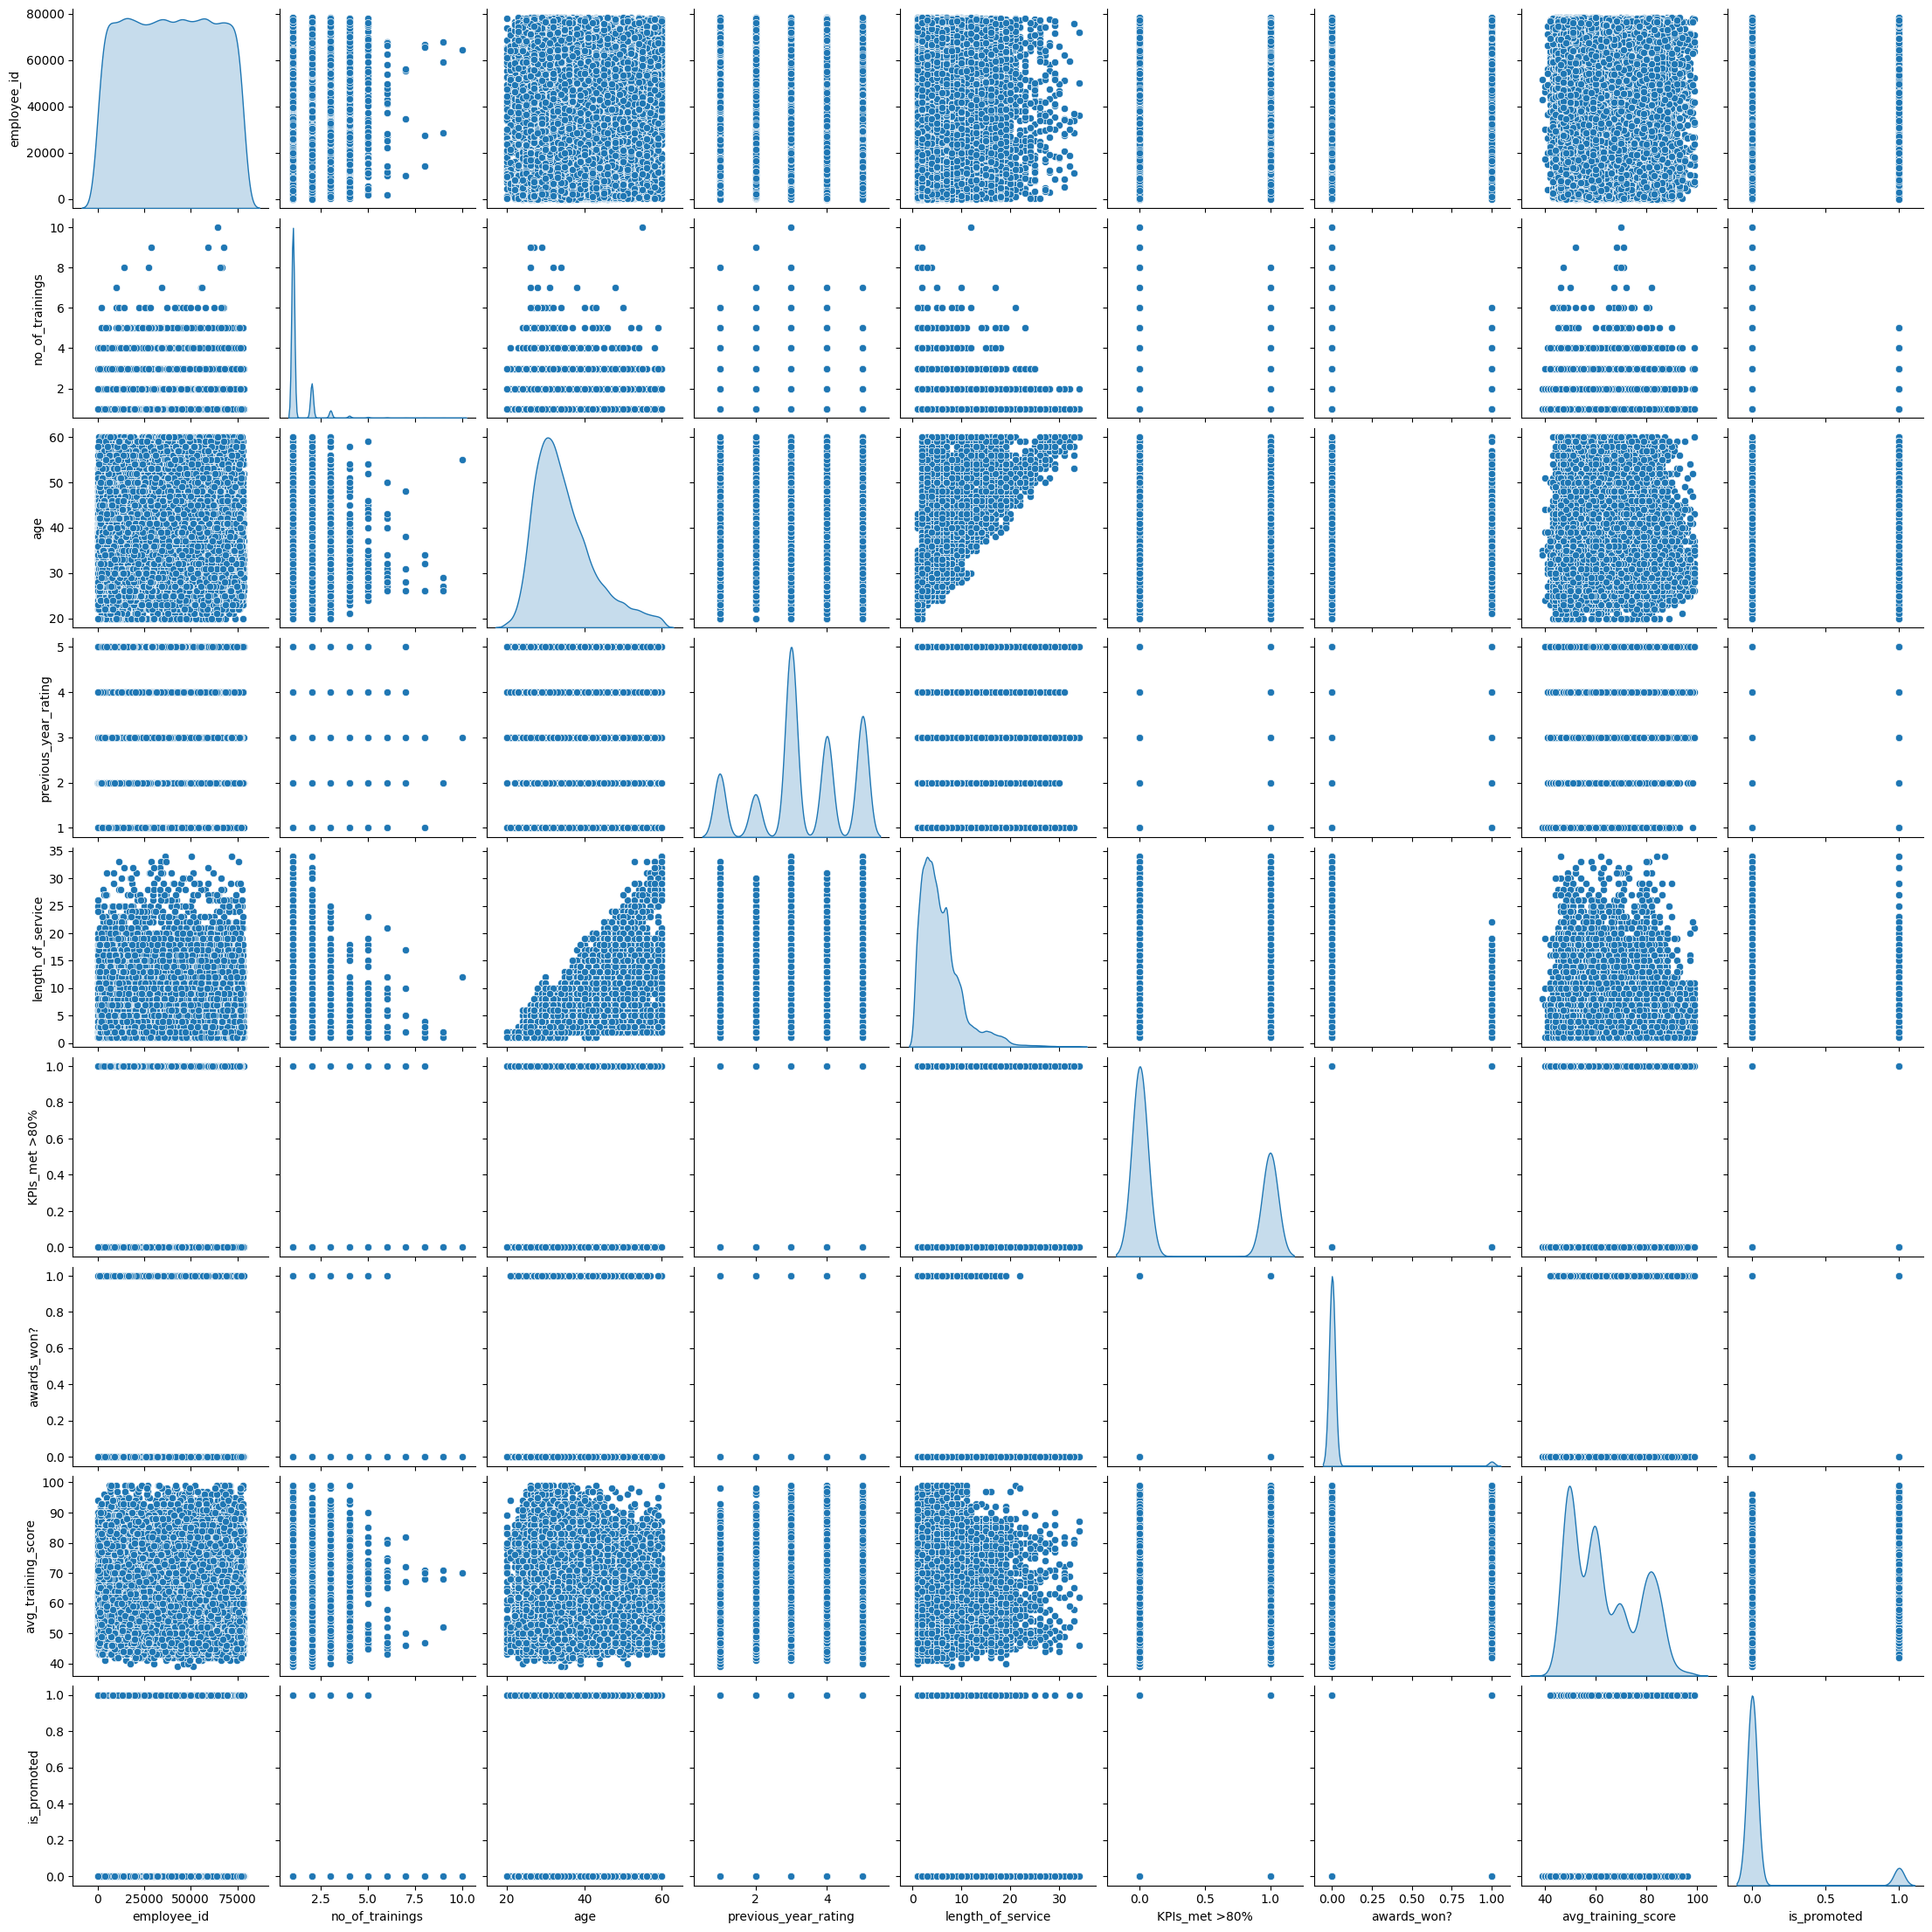

In [25]:
# Pair plot creation
sns.pairplot(train[numeric_columns], diag_kind='kde')
plt.show()

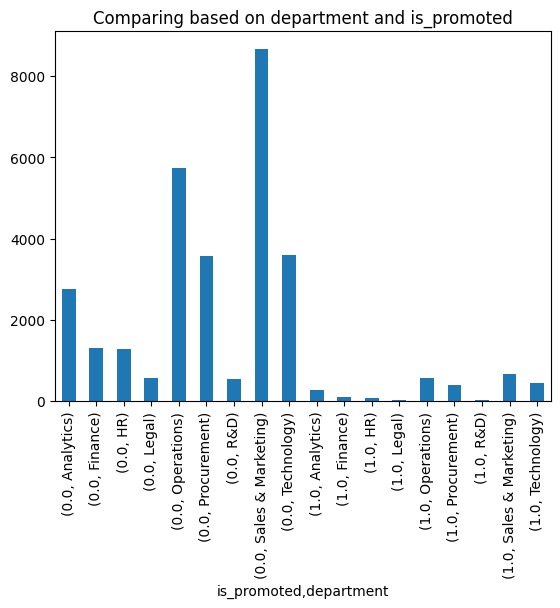

department
Analytics            10.432075
Finance               4.203970
HR                    3.269755
Legal                 1.128844
Operations           21.798365
Procurement          15.025302
R&D                   1.362398
Sales & Marketing    25.846633
Technology           16.932659
Name: employee_id, dtype: float64


In [27]:
# A Bar plot

train.groupby(['is_promoted','department'])['employee_id'].count().plot(kind = 'bar')
plt.title('Comparing based on department and is_promoted')
plt.show()

#percentages of employess who are promoted
d = train[train['is_promoted'] == 1].groupby('department').count()['employee_id']
print((d / d.sum()) * 100)

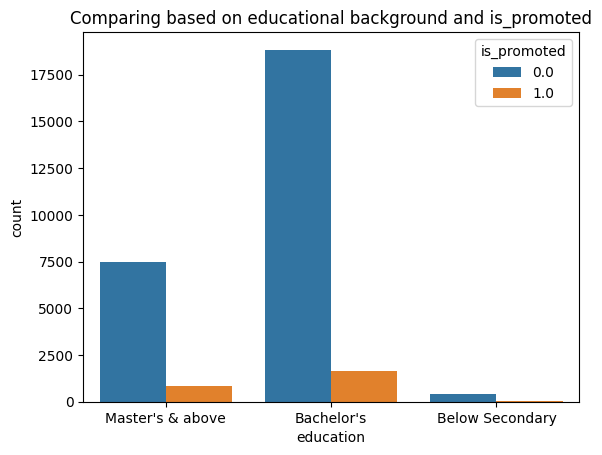

education
Bachelor's          65.461847
Master's & above    33.574297
Below Secondary      0.963855
Name: proportion, dtype: float64

In [28]:
# Employees with which educational background have been promoted the most?

sns.countplot(x = 'education', hue = 'is_promoted', data = train)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

#print percentages of  Below Secondary,Bachelor's & Master's & above who are promoted
train[train['is_promoted'] == 1]['education'].value_counts(normalize = True) * 100

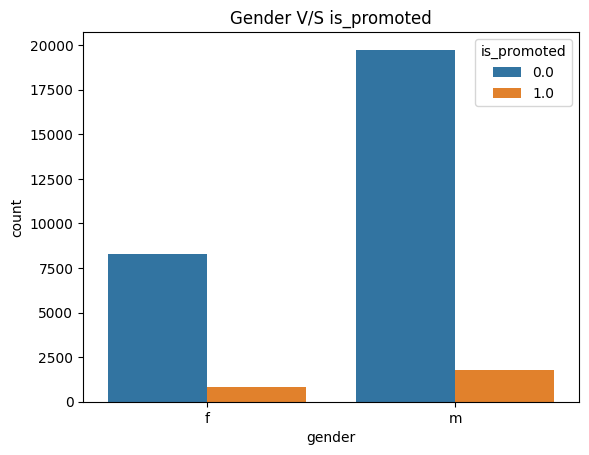

gender
m    68.66485
f    31.33515
Name: proportion, dtype: float64

In [33]:
# Comparisons

sns.countplot(x = 'gender', hue = 'is_promoted', data = train)
plt.title('Gender V/S is_promoted')
plt.show()

#percentages of females vs. males who are promoted
train[train['is_promoted'] == 1]['gender'].value_counts(normalize = True) * 100

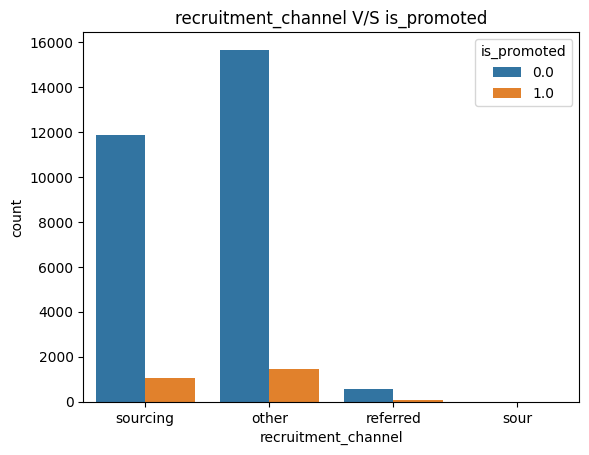

recruitment_channel
other       55.702608
sourcing    41.144414
referred     3.152978
Name: proportion, dtype: float64

In [34]:
# Comparison of promotions

sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = train)
plt.title('recruitment_channel V/S is_promoted')
plt.show()

train[train['is_promoted'] == 1]['recruitment_channel'].value_counts(normalize = True) * 100

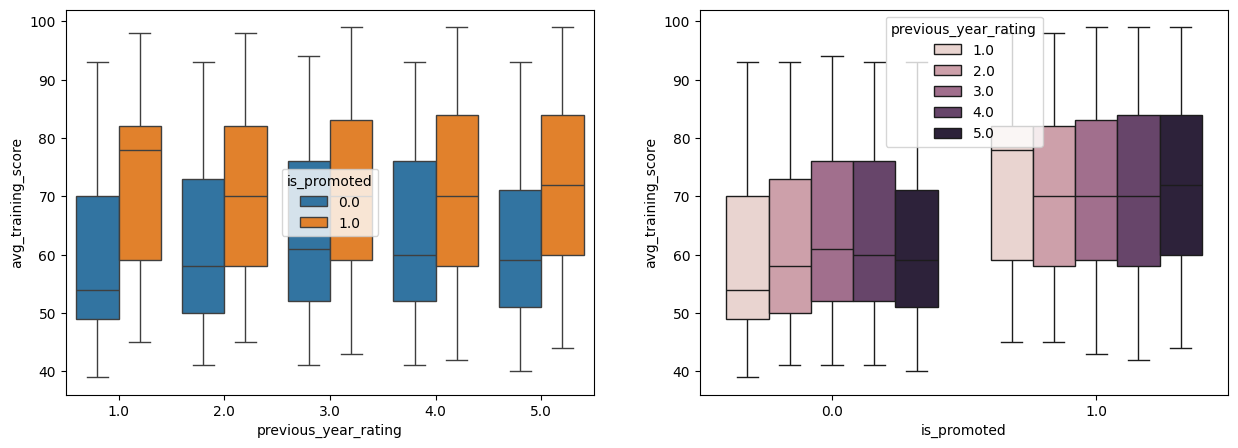

In [31]:
# create subplot plot
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# boxplot
sns.boxplot(x='previous_year_rating',y='avg_training_score',data=train,hue='is_promoted', ax = axes[0])
sns.boxplot(x='is_promoted',y='avg_training_score',data=train,hue='previous_year_rating', ax = axes[1])
plt.show()

In [ ]:
#average training score has a significant impact on the promotion

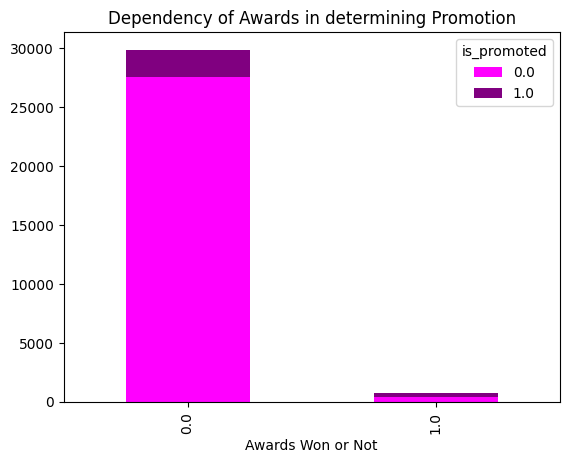

awards_won?
0.0    88.789412
1.0    11.210588
Name: proportion, dtype: float64

In [32]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion')
plt.xlabel('Awards Won or Not')
plt.show()

train[train['is_promoted'] == 1]['awards_won?'].value_counts(normalize = True) * 100

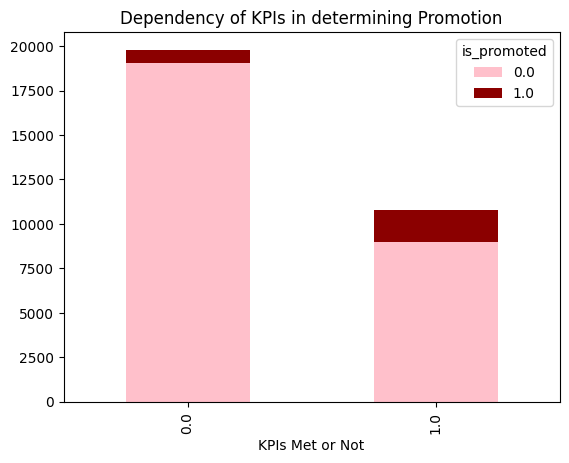

KPIs_met >80%
1.0    70.144025
0.0    29.855975
Name: proportion, dtype: float64


In [35]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.show()

print(train[train['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True) * 100)

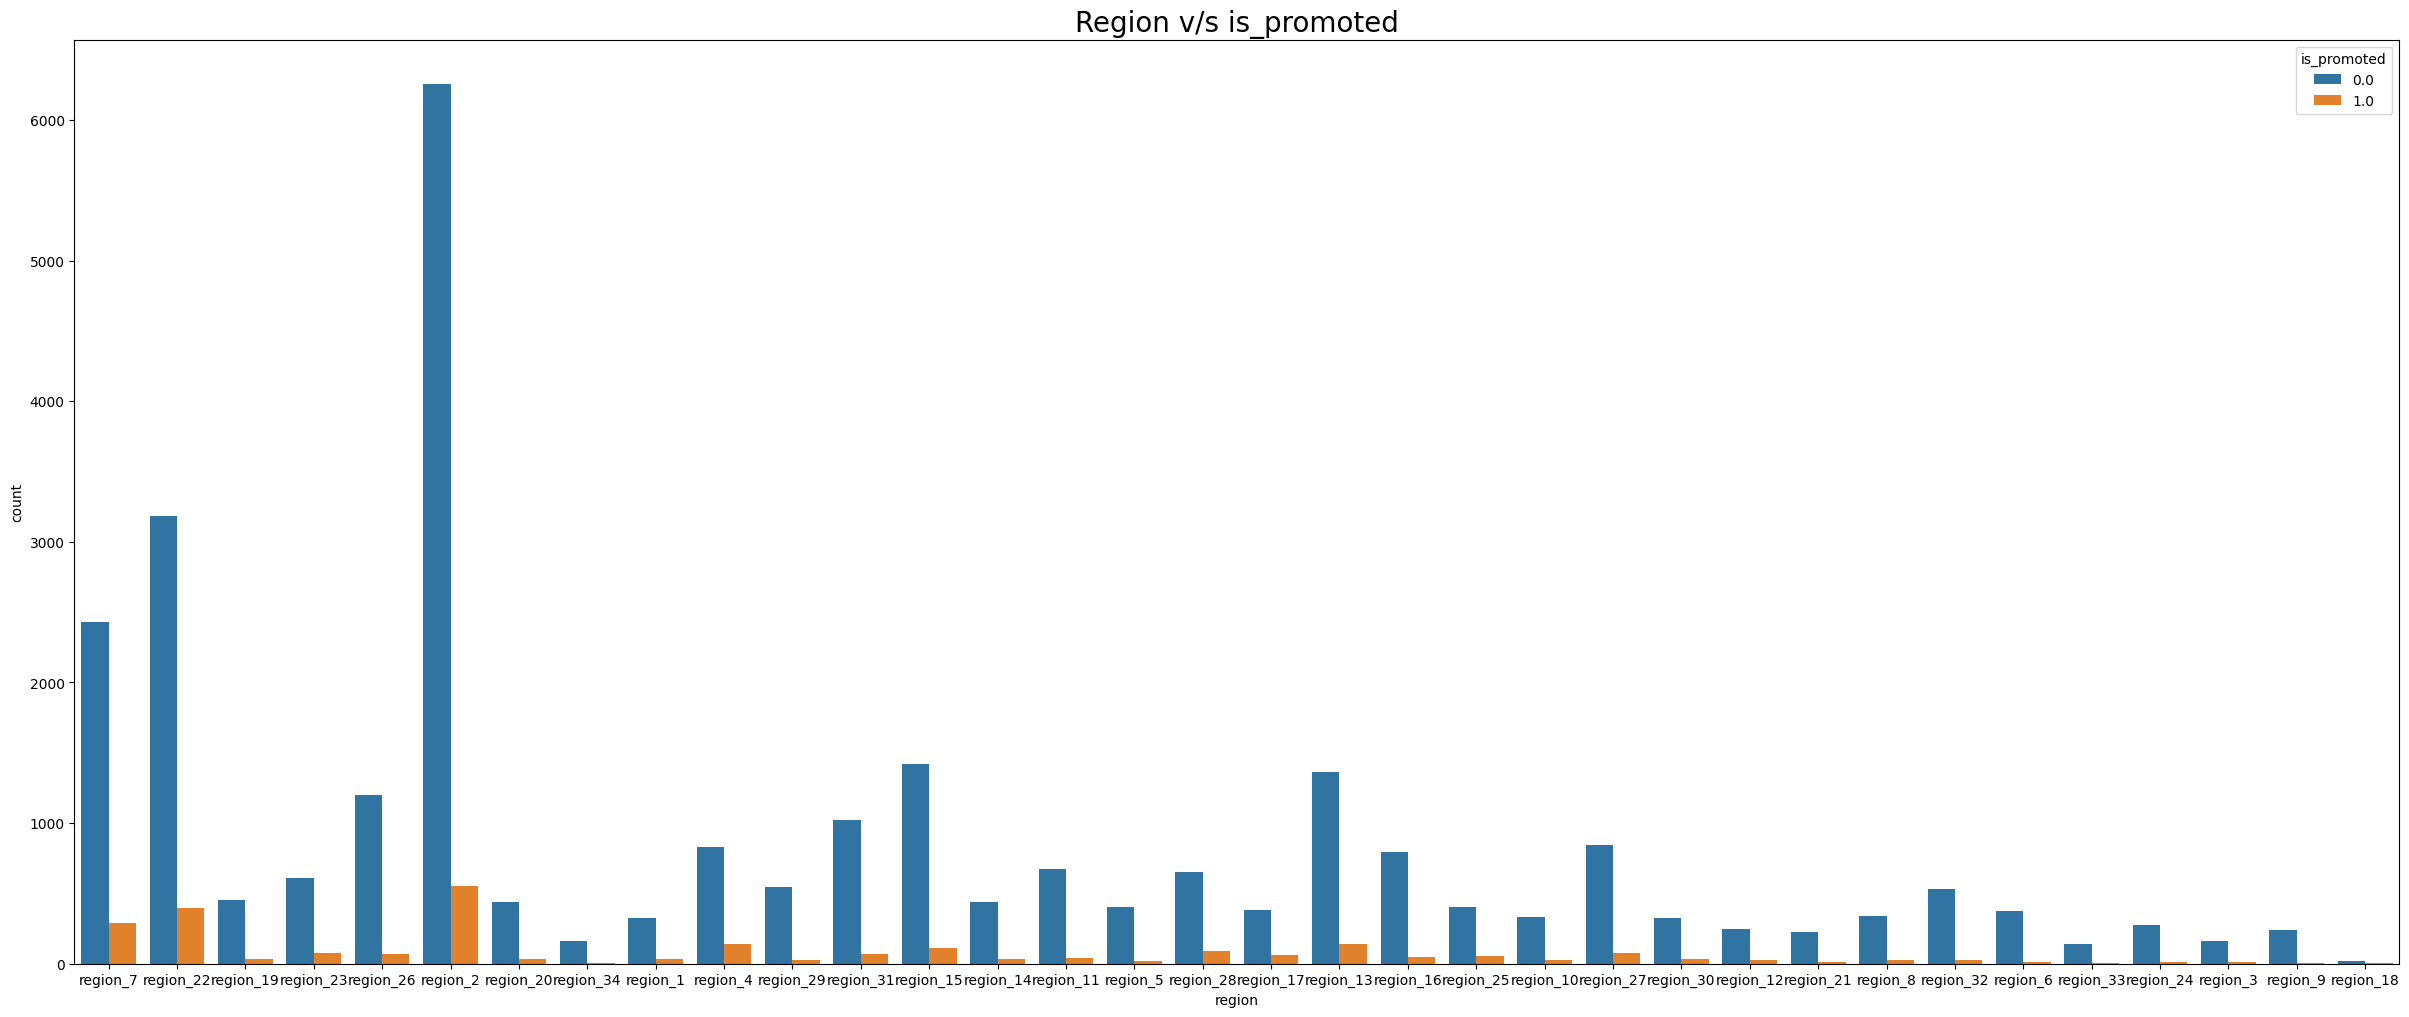

In [36]:
#Region and is_promoted

plt.figure(figsize=(30,12))
sns.countplot(x='region',data=train,hue='is_promoted')
plt.title('Region v/s is_promoted',fontsize = 20)
plt.show()

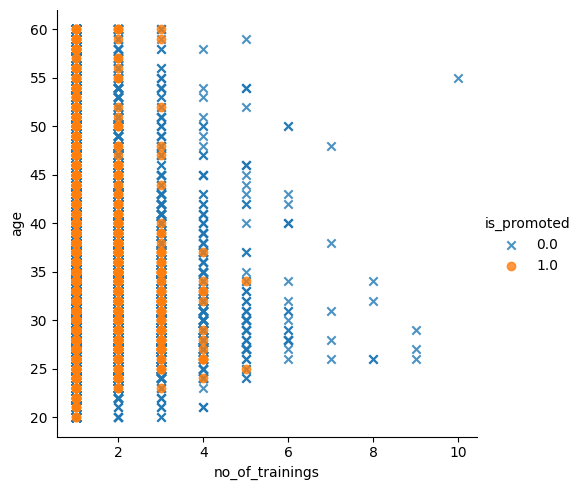

In [37]:
#no of trainings and is promoted
sns.lmplot(x='no_of_trainings',y='age',data=train,fit_reg=False,hue='is_promoted',markers=['x','o'])
plt.show()

Data Preprocessing

In [38]:
#checking missing values in train data
train.isna().sum()

employee_id                0
department                 0
region                     0
education               1385
gender                     0
recruitment_channel        0
no_of_trainings            1
age                        1
previous_year_rating    2324
length_of_service          1
KPIs_met >80%              1
awards_won?                1
avg_training_score         1
is_promoted                1
dtype: int64

In [39]:
#checking missing values in test data
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30596 entries, 0 to 30595
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           30596 non-null  int64  
 1   department            30596 non-null  object 
 2   region                30596 non-null  object 
 3   education             29211 non-null  object 
 4   gender                30596 non-null  object 
 5   recruitment_channel   30596 non-null  object 
 6   no_of_trainings       30595 non-null  float64
 7   age                   30595 non-null  float64
 8   previous_year_rating  28272 non-null  float64
 9   length_of_service     30595 non-null  float64
 10  KPIs_met >80%         30595 non-null  float64
 11  awards_won?           30595 non-null  float64
 12  avg_training_score    30595 non-null  float64
 13  is_promoted           30595 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 3.3+ MB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [42]:
# Encoding
cat_columns = train.select_dtypes(include=['object']).columns

In [43]:
#categorical columns
train_encoded = pd.get_dummies(train, columns=cat_columns)

In [44]:
#encoded DataFrame
print(train_encoded.head())

   employee_id  no_of_trainings   age  previous_year_rating  \
0        65438              1.0  35.0                   5.0   
1        65141              1.0  30.0                   5.0   
2         7513              1.0  34.0                   3.0   
3         2542              2.0  39.0                   1.0   
4        48945              1.0  45.0                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                8.0            1.0          0.0                49.0   
1                4.0            0.0          0.0                60.0   
2                7.0            0.0          0.0                50.0   
3               10.0            0.0          0.0                50.0   
4                2.0            0.0          0.0                73.0   

   is_promoted  department_Analytics  ...  region_region_9  \
0          0.0                 False  ...            False   
1          0.0                 False  ...            False   
2 

In [46]:
# Handling Missing Values
# Filling missing values with mean
train_encoded.fillna(train_encoded.mean(), inplace=True)

In [47]:
train_encoded.isna().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
                               ..
gender_m                        0
recruitment_channel_other       0
recruitment_channel_referred    0
recruitment_channel_sour        0
recruitment_channel_sourcing    0
Length: 61, dtype: int64

In [48]:
# Select cateogrical value for encoding
cat_columns_test = test.select_dtypes(include=['object']).columns

In [49]:
# One-hot encode categorical columns
test_encoded = pd.get_dummies(test, columns=cat_columns_test)

In [50]:
# Display the encoded DataFrame
print(test_encoded.head())

   employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0         8724                1   24                   NaN                  1   
1        74430                1   31                   3.0                  5   
2        72255                1   31                   1.0                  4   
3        38562                3   31                   2.0                  9   
4        64486                1   30                   4.0                  7   

   KPIs_met >80%  awards_won?  avg_training_score  department_Analytics  \
0              1            0                  77                 False   
1              0            0                  51                 False   
2              0            0                  47                 False   
3              0            0                  65                 False   
4              0            0                  61                 False   

   department_Finance  ...  region_region_8  region_region_9  

In [51]:
#handling missing values
test_encoded.fillna(test_encoded.mean(), inplace=True)  # Filling missing values with mean

In [52]:
test_encoded.isna().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_

In [53]:
#Submission
submit = test['employee_id']
submission = pd.DataFrame()
submission['employee_id'] = submit
submission['is_promoted'] = np.nan

In [54]:
train_encoded["is_promoted"] = train_encoded["is_promoted"].astype(int)

y = train_encoded["is_promoted"]
x = train_encoded.drop(labels = ["is_promoted"],axis = 1)

In [55]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (21417, 60)
Shape of x_valid:  (9179, 60)
Shape of y_train:  (21417,)
Shape of y_valid:  (9179,)


In [56]:
# Separate numerical and categorical columns
numerical_columns = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = x_train.select_dtypes(include=['object']).columns  # Assuming categorical columns are of 'object' type

In [57]:
# standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_numeric = scaler.fit_transform(x_train[numerical_columns])
x_test_numeric = scaler.transform(x_test[numerical_columns])
test_numeric = scaler.transform(test[numerical_columns])

Modelling

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report,f1_score

In [59]:
#Logistic Regression

lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(x_train,y_train)

y_test_pred = lr.predict(x_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

Accuracy_score: 0.9156770890075172


In [60]:
f1_score(y_test, y_test_pred, zero_division=1)

0.0

Create a decition tree

Hyperparameter Tuning

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 ,
                             cv = 3,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789f67b11b40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789f6846fa00>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789f6846e530>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [62]:
print(rsearch.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [63]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
y_train_prob = dt.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(x_test)
y_test_prob = dt.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9428024466545267
0.9031044415377616
0.9364854559320187
0.8718327774504875


In [64]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=x.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.346593
department_Sales & Marketing,0.164503
department_Operations,0.115507
KPIs_met >80%,0.112900
previous_year_rating,0.039003
awards_won?,0.033200
department_Analytics,0.029119
employee_id,0.023778
department_Finance,0.022938
department_R&D,0.020281


In [65]:
print(x.columns)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'r

In [66]:
# Feature selection (Dropping insignificant features)

x_new = x[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
           'KPIs_met >80%', 'avg_training_score', 'department_Analytics',
           'department_Finance', 'department_HR', 'department_Legal',
           'department_Operations', 'department_Procurement', 'department_R&D',
           'department_Sales & Marketing', 'department_Technology',
           'region_region_1', 'region_region_10', 'region_region_11',
           'region_region_12', 'region_region_13', 'region_region_14',
           'region_region_15', 'region_region_16', 'region_region_17',
           'region_region_18', 'region_region_19', 'region_region_2',
           'region_region_20', 'region_region_21', 'region_region_22',
           'region_region_23', 'region_region_24', 'region_region_25',
           'region_region_26', 'region_region_27', 'region_region_28',
           'region_region_29', 'region_region_3', 'region_region_30',
           'region_region_31', 'region_region_32', 'region_region_33',
           'region_region_34', 'region_region_4', 'region_region_5',
           'region_region_6', 'region_region_7', 'region_region_8',
           'region_region_9', "education_Bachelor's", 'education_Below Secondary',
           "education_Master's & above", 'gender_f', 'gender_m',
           'recruitment_channel_other', 'recruitment_channel_referred',
           'recruitment_channel_sourcing']]
y_new = y

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 ,
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(x_new,y_new)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789faaf57490>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789f6dc51d20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789f6d81ac20>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [68]:
print(rsearch.best_params_)

{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x_new,y_new,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
y_train_prob = dt.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(x_test)
y_test_prob = dt.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9381332586263249
0.895471906278435
0.9361586229436758
0.8653094639169383


In [70]:
print(test.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')


In [71]:
test_new = test[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']]

*Model* *Submission*

Model submission
dt = DecisionTreeClassifier(**rsearch.best_params_)

dt.fit(X_new,y_new) predict = dt.predict(test_new)

submission['is_promoted'] = predict

submission.to_csv('Sample_Submission_dt_new.csv',index=False)

In [72]:
#Feature Importance

imp = pd.DataFrame(dt.feature_importances_,index=x_new.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.385615
department_Sales & Marketing,0.157593
department_Operations,0.138686
KPIs_met >80%,0.126714
previous_year_rating,0.033437
department_Analytics,0.031392
department_R&D,0.031031
age,0.021155
department_Technology,0.020795
department_Finance,0.020317


In [73]:
# Feature selection (Dropping insignificant features)

x_new2 = x[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
           'KPIs_met >80%', 'avg_training_score', 'department_Analytics',
           'department_Finance', 'department_HR', 'department_Legal',
           'department_Operations', 'department_Procurement', 'department_R&D',
           'department_Sales & Marketing', 'department_Technology',
           'region_region_1', 'region_region_10', 'region_region_11',
           'region_region_12', 'region_region_13', 'region_region_14',
           'region_region_15', 'region_region_16', 'region_region_17',
           'region_region_18', 'region_region_19', 'region_region_2',
           'region_region_20', 'region_region_21', 'region_region_22',
           'region_region_23', 'region_region_24', 'region_region_25',
           'region_region_26', 'region_region_27', 'region_region_28',
           'region_region_29', 'region_region_3', 'region_region_30',
           'region_region_31', 'region_region_32', 'region_region_33',
           'region_region_34', 'region_region_4', 'region_region_5',
           'region_region_6', 'region_region_7', 'region_region_8',
           'region_region_9', "education_Bachelor's", 'education_Below Secondary',
           "education_Master's & above", 'gender_f', 'gender_m',
           'recruitment_channel_other', 'recruitment_channel_referred',
           'recruitment_channel_sourcing']]
y_new2 = y

# Hyperparameter Tuning

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 ,
                             cv = 10,scoring='roc_auc',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(x_new2,y_new2)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789f714201c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789faaf55cc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x789fa9c28ee0>},
                   random_state=3, return_train_score=True, scoring='roc_auc')

In [75]:
print(rsearch.best_params_)

{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x_new2,y_new2,test_size = 0.3, random_state = 3)

dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
y_train_prob = dt.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = dt.predict(x_test)
y_test_prob = dt.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9411182066988141
0.908337893514872
0.9407650672018488
0.8852559821511077


In [76]:
test_new2 = test[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']]

In [77]:
### RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_train_pred = rf.predict(x_train)
y_train_prob = rf.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = rf.predict(x_test)
y_test_prob = rf.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.999906616239436
1.0
0.9309292951301885
0.8700961222384693


In [78]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 1.9 MB/s eta 0:00:00


In [79]:
## catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier()

cat.fit(x_train,y_train)

y_train_pred = cat.predict(x_train)
y_train_prob = cat.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = cat.predict(x_test)
y_test_prob = cat.predict_proba(x_test)[:,1]

print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

Learning rate set to 0.038121
0:	learn: 0.6477079	total: 117ms	remaining: 1m 56s
1:	learn: 0.6109240	total: 158ms	remaining: 1m 18s
2:	learn: 0.5743470	total: 177ms	remaining: 58.9s
3:	learn: 0.5401771	total: 202ms	remaining: 50.3s
4:	learn: 0.4997879	total: 221ms	remaining: 43.9s
5:	learn: 0.4731403	total: 237ms	remaining: 39.2s
6:	learn: 0.4501371	total: 253ms	remaining: 35.9s
7:	learn: 0.4302087	total: 269ms	remaining: 33.3s
8:	learn: 0.4041736	total: 294ms	remaining: 32.4s
9:	learn: 0.3890573	total: 321ms	remaining: 31.8s
10:	learn: 0.3738464	total: 354ms	remaining: 31.8s
11:	learn: 0.3612533	total: 371ms	remaining: 30.6s
12:	learn: 0.3482208	total: 389ms	remaining: 29.5s
13:	learn: 0.3366815	total: 415ms	remaining: 29.3s
14:	learn: 0.3233792	total: 433ms	remaining: 28.4s
15:	learn: 0.3158382	total: 465ms	remaining: 28.6s
16:	learn: 0.3077647	total: 481ms	remaining: 27.8s
17:	learn: 0.2963103	total: 517ms	remaining: 28.2s
18:	learn: 0.2912152	total: 545ms	remaining: 28.2s
19:	learn

In [80]:
##XGBoost

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
y_train_prob = xgb.predict_proba(x_train)[:,1]

print(accuracy_score(y_train,y_train_pred))
print(roc_auc_score(y_train,y_train_prob))

y_test_pred = xgb.predict(x_test)
y_test_prob = xgb.predict_proba(x_test)[:,1]

print('\n')
print(accuracy_score(y_test,y_test_pred))
print(roc_auc_score(y_test,y_test_prob))

0.9528878927954428
0.9774870621019109


0.9396448414860007
0.8999204087278354


In [81]:
imp = pd.DataFrame(xgb.feature_importances_,index=x_new2.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
KPIs_met >80%,0.167743
department_Sales & Marketing,0.125880
department_Procurement,0.072808
department_Operations,0.060124
department_Analytics,0.052209
department_Finance,0.034752
avg_training_score,0.032879
department_R&D,0.032638
department_HR,0.023440
previous_year_rating,0.021703
